In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from keras import layers, callbacks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (accuracy_score, precision_score,recall_score,f1_score, roc_auc_score,roc_curve, confusion_matrix)


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_dataset.csv')
df.head()

,Age,Heart Rate,Glucose,KCM,Troponin,Output,BP_PC1,BP_PC2
0,0.611111,0.398810,0.514403,0.126098,0.053659,0.0,0.283868,0.073740
1,0.013889,0.732143,1.000000,0.548129,1.000000,1.0,-0.414488,0.100240
2,0.486111,0.375000,0.967078,0.142297,0.009756,0.0,0.223914,0.132454
3,0.611111,0.446429,0.967078,1.000000,0.590244,1.0,-0.207943,0.131242
4,0.486111,0.375000,1.000000,0.064711,0.009756,0.0,-0.150425,-0.009916


In [ ]:
X = df.drop('Output', axis=1)
y = df['Output']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
df.shape

(1321, 8)

**Logistic Regression**




In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_score_lr = roc_auc_score(y_test, y_pred_lr)



---



**KNN**




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_score_knn = roc_auc_score(y_test, y_pred_knn)




---



**SVM**

In [ ]:
from sklearn.svm import SVC
for kernel in ['linear', 'rbf']:
    model_svm = SVC(kernel=kernel, probability=True, random_state=42)
    model_svm.fit(X_train, y_train)
    print(f"\n SVM: ({kernel}) Support Vectors: ",len(model_svm.support_vectors_))



 SVM: (linear) Support Vectors:  383

 SVM: (rbf) Support Vectors:  355


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_svm = SVC(kernel='linear', probability=True, random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
roc_auc_score_svm = roc_auc_score(y_test, y_pred_svm)







------



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
print("\nTree Depth: ", model_dt.get_depth())
print("Feature Importance: ",pd.Series(model_dt.feature_importances_, index=X.columns))



Tree Depth:  9
Feature Importance:  Age           0.005742
Heart Rate    0.001553
Glucose       0.003328
KCM           0.371058
Troponin      0.602470
BP_PC1        0.000000
BP_PC2        0.015848
dtype: float64


In [ ]:
y_pred_dt = model_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_score_dt = roc_auc_score(y_test, y_pred_dt)



---





**Random Forest**

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    max_depth=10,
    min_samples_split=5,
    bootstrap=True,
    class_weight='balanced',
    min_samples_leaf=5
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_score_rf = roc_auc_score(y_test, y_pred_rf)




---



**ANN**

In [ ]:
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105 (420.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5862 - loss: 0.6915 - val_accuracy: 0.6462 - val_loss: 0.6854
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6927 - loss: 0.6817 - val_accuracy: 0.7264 - val_loss: 0.6667
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7420 - loss: 0.6624 - val_accuracy: 0.7877 - val_loss: 0.6292
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7914 - loss: 0.6101 - val_accuracy: 0.7972 - val_loss: 0.5453
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8106 - loss: 0.5335 - val_accuracy: 0.8396 - val_loss: 0.4626
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8364 - loss: 0.4517 - val_accuracy: 0.8726 - val_loss: 0.3946
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8774 - loss: 0.3791 - val_accuracy: 0.8726 - val_loss: 0.3478
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8609 - loss: 0.3603 - val_accuracy: 0.8726 - val_loss:

In [ ]:
y_pred_ann = model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5).astype(int)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [ ]:
accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)
roc_auc_score_ann = roc_auc_score(y_test, y_pred_ann)

**Model Comparison**

In [ ]:
metrics = {
    'Logistic Regression': {
        'Accuracy': accuracy_lr,
        'Precision': precision_lr,
        'Recall': recall_lr,
        'F1 Score': f1_lr,
        'ROC AUC Score': roc_auc_score_lr
    },
    'KNN': {
        'Accuracy': accuracy_knn,
        'Precision': precision_knn,
        'Recall': recall_knn,
        'F1 Score': f1_knn,
        'ROC AUC Score': roc_auc_score_knn
    },
    'SVM (Linear)': {
        'Accuracy': accuracy_svm,
        'Precision': precision_svm,
        'Recall': recall_svm,
        'F1 Score': f1_svm,
        'ROC AUC Score': roc_auc_score_svm
    },
    'Decision Tree': {
        'Accuracy': accuracy_dt,
        'Precision': precision_dt,
        'Recall': recall_dt,
        'F1 Score': f1_dt,
        'ROC AUC Score': roc_auc_score_dt
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1 Score': f1_rf,
        'ROC AUC Score': roc_auc_score_rf
    },
    'ANN': {
        'Accuracy': accuracy_ann,
        'Precision': precision_ann,
        'Recall': recall_ann,
        'F1 Score': f1_ann,
        'ROC AUC Score': roc_auc_score_ann
    }
}

metrics_df = pd.DataFrame(metrics).T
display(metrics_df)

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Logistic Regression,0.913208,0.960526,0.895706,0.926984,0.918441
KNN,0.890566,0.965278,0.852761,0.905537,0.901871
SVM (Linear),0.916981,0.973154,0.889571,0.929487,0.925177
Decision Tree,0.973585,0.969880,0.987730,0.978723,0.969355
Random Forest,0.981132,0.987654,0.981595,0.984615,0.980994
ANN,0.935849,0.967949,0.926380,0.946708,0.938680


from matplotlib import pyplot as plt
_df_0['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Recall', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='F1 Score', y='ROC AUC Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Accuracy', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Precision', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Recall', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='F1 Score', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

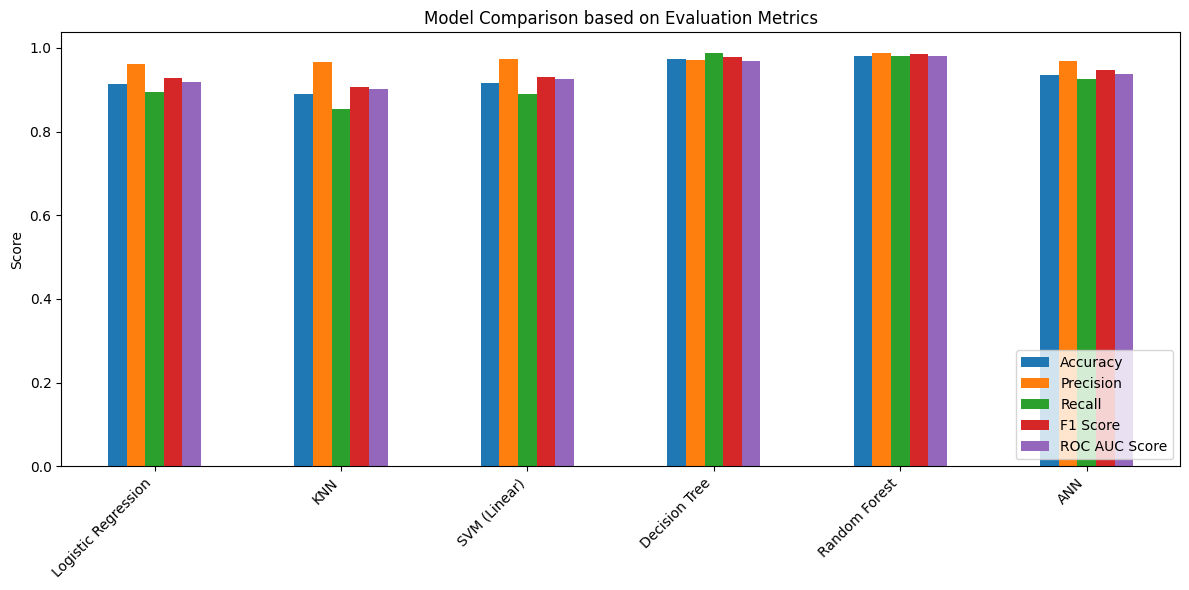

In [ ]:
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison based on Evaluation Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()